In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import Counter
from util import get_common_words
from wordcloud import WordCloud
import scipy.stats as stats

In [45]:
df = pd.read_csv('data/train.csv')

# Basic info

In [46]:
df_info = df.info()
df_head = df.head()
df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56355 entries, 0 to 56354
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  56355 non-null  object
 1   sql       56355 non-null  object
dtypes: object(2)
memory usage: 880.7+ KB


(None,
                                             question  \
 0    Tell me what the notes are for South Australia    
 1  What is the current series where the new serie...   
 2            What is the format for South Australia?   
 3  Name the background colour for the Australian ...   
 4      how many times is the fuel propulsion is cng?   
 
                                                  sql  
 0  SELECT Notes FROM table WHERE Current slogan =...  
 1  SELECT Current series FROM table WHERE Notes =...  
 2  SELECT Format FROM table WHERE State/territory...  
 3  SELECT Text/background colour FROM table WHERE...  
 4  SELECT COUNT Fleet Series (Quantity) FROM tabl...  )

### Average lens of sql queries and nl questions

In [47]:
df['question_len'] = df['question'].apply(len)
question_len_stats = df['question_len'].describe()
question_len_stats

count    56355.000000
mean        61.009103
std         23.603986
min         12.000000
25%         44.000000
50%         57.000000
75%         74.000000
max        244.000000
Name: question_len, dtype: float64

In [48]:
df['sql_len'] = df['sql'].apply(len)
sql_len_stats = df['sql_len'].describe()
sql_len_stats

count    56355.000000
mean        63.822021
std         18.375983
min         22.000000
25%         51.000000
50%         60.000000
75%         73.000000
max        468.000000
Name: sql_len, dtype: float64

### Duplicates

In [49]:
dupes = df.duplicated().sum()
dupes

189

In [50]:
df = df.drop_duplicates()

### Most common nl and sql questions (see `get_common_words` in `util.py`)

In [51]:


common_words_question = get_common_words(df['question'])
common_words_question

[('the', 60608),
 ('what', 33518),
 ('is', 31595),
 ('of', 27819),
 ('a', 17181),
 ('was', 13410),
 ('and', 12117),
 ('for', 11454),
 ('when', 11127),
 ('than', 10682),
 ('with', 8858),
 ('has', 8634),
 ('in', 8487),
 ('which', 7772),
 ('team', 6322),
 ('name', 5151),
 ('who', 5104),
 ('how', 5057),
 ('number', 4693),
 ('many', 4606),
 ('score', 4470),
 ('s', 4339),
 ('that', 4338),
 ('1', 4184),
 ('on', 3620),
 ('date', 3515),
 ('2', 3443),
 ('total', 3244),
 ('had', 3111),
 ('less', 3104),
 ('game', 3075),
 ('3', 2685),
 ('0', 2579),
 ('did', 2547),
 ('points', 2535),
 ('year', 2457),
 ('an', 2414),
 ('4', 2408),
 ('as', 2364),
 ('player', 2318),
 ('6', 2309),
 ('at', 2212),
 ('home', 2133),
 ('5', 2104),
 ('are', 2071),
 ('more', 2065),
 ('where', 2062),
 ('larger', 1994),
 ('average', 1937),
 ('were', 1918)]

In [52]:
common_words_sql = get_common_words(df['sql'])
common_words_sql

[('from', 56440),
 ('table', 56214),
 ('select', 56167),
 ('where', 55767),
 ('and', 21275),
 ('team', 7057),
 ('date', 6385),
 ('count', 5162),
 ('score', 4604),
 ('1', 4311),
 ('year', 3710),
 ('2', 3642),
 ('min', 3246),
 ('max', 3239),
 ('name', 2945),
 ('3', 2742),
 ('0', 2616),
 ('player', 2602),
 ('points', 2535),
 ('home', 2446),
 ('4', 2425),
 ('avg', 2381),
 ('6', 2322),
 ('s', 2278),
 ('of', 2217),
 ('5', 2136),
 ('rank', 2086),
 ('opponent', 2053),
 ('sum', 2042),
 ('position', 1983),
 ('away', 1905),
 ('total', 1902),
 ('record', 1829),
 ('7', 1721),
 ('venue', 1683),
 ('title', 1681),
 ('attendance', 1672),
 ('result', 1631),
 ('in', 1625),
 ('8', 1553),
 ('location', 1540),
 ('country', 1540),
 ('time', 1529),
 ('no', 1473),
 ('round', 1468),
 ('9', 1351),
 ('10', 1349),
 ('season', 1209),
 ('by', 1189),
 ('game', 1159)]

# Viz

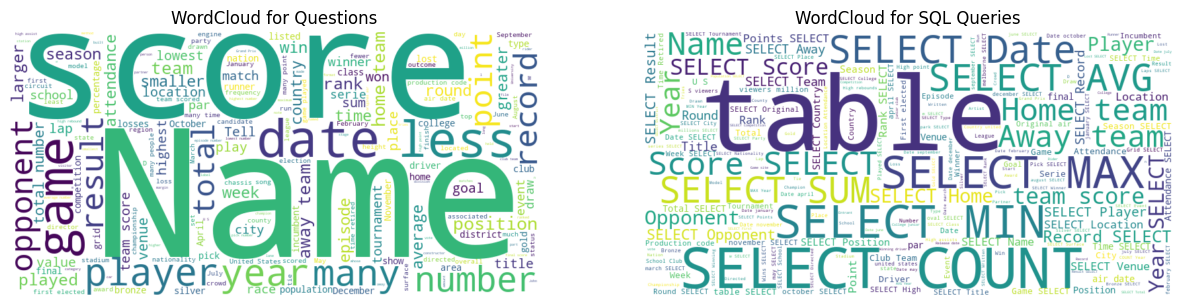

In [53]:
question_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['question']))
sql_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['sql']))
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(question_wordcloud, interpolation='bilinear')
plt.title('WordCloud for Questions')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sql_wordcloud, interpolation='bilinear')
plt.title('WordCloud for SQL Queries')
plt.axis('off')

plt.show()


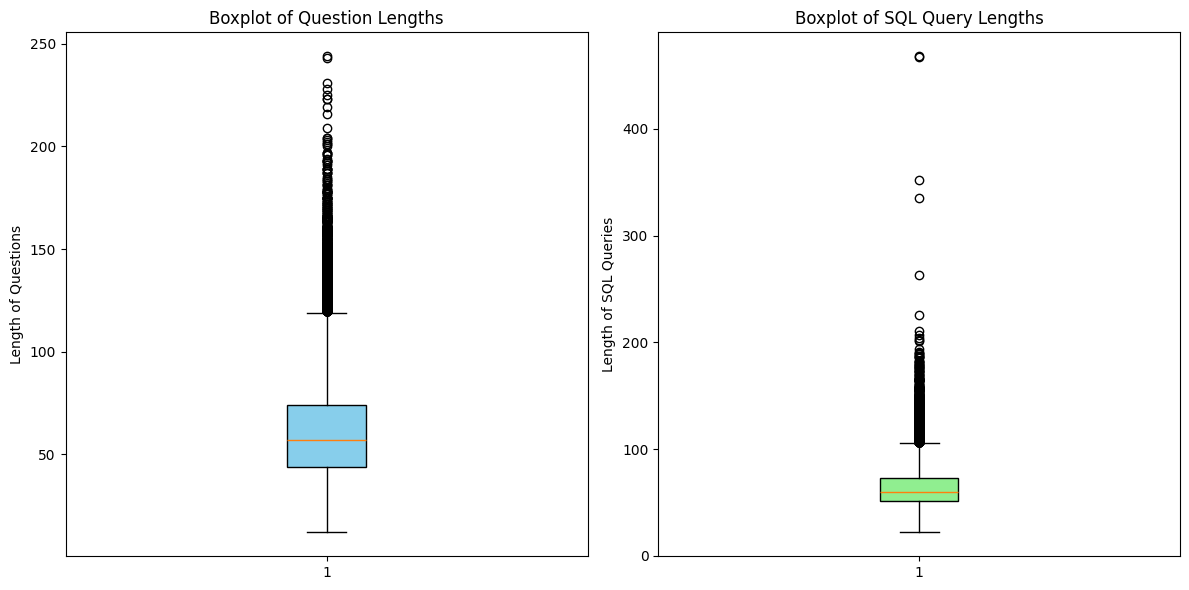

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['question_len'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Boxplot of Question Lengths')
plt.ylabel('Length of Questions')
plt.subplot(1, 2, 2)
plt.boxplot(df['sql_len'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Boxplot of SQL Query Lengths')
plt.ylabel('Length of SQL Queries')

plt.tight_layout()
plt.show()


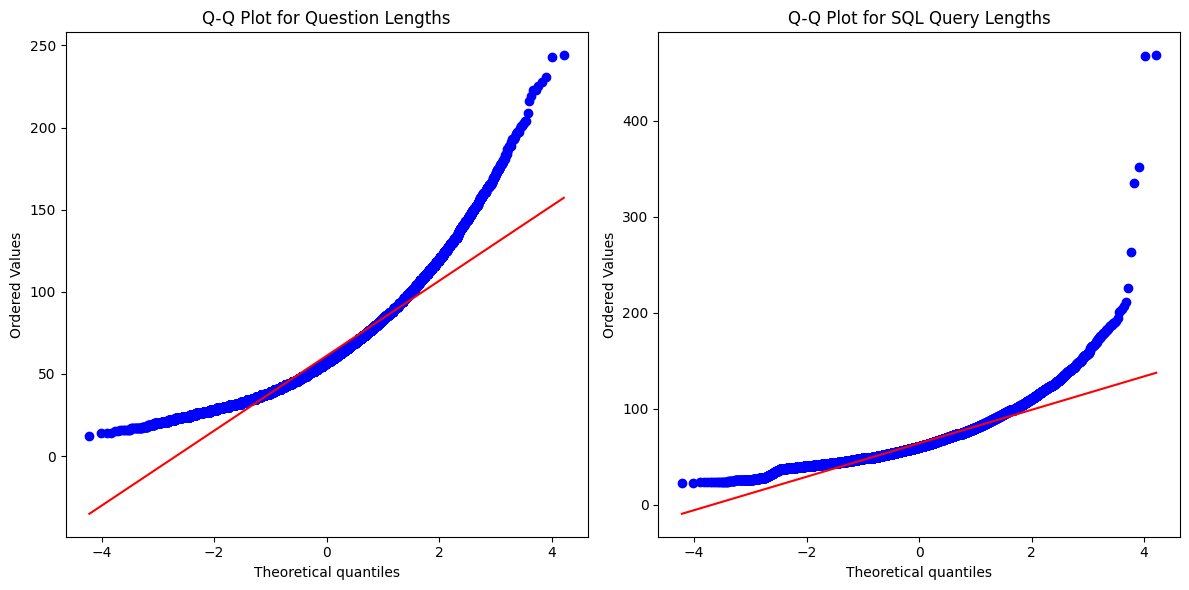

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(df['question_len'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Question Lengths')
plt.subplot(1, 2, 2)
stats.probplot(df['sql_len'], dist="norm", plot=plt)
plt.title('Q-Q Plot for SQL Query Lengths')
plt.tight_layout()
plt.show()
